# Data exploration
Temperature

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [2]:
# climato check
clim = xr.open_dataset("/home/majanvie/scratch/data/raw/obs/climato/2m_temperature_1996_2017_month2_lead3.nc")
clim

<xarray.Dataset>
Dimensions:    (date: 29, latitude: 121, longitude: 240)
Coordinates:
  * longitude  (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float64 -90.0 -88.5 -87.0 -85.5 ... 87.0 88.5 90.0
  * date       (date) object '02-01' '02-04' '02-08' ... '02-12' '02-19' '02-26'
Data variables:
    mu         (date, latitude, longitude) float32 ...
    sigma      (date, latitude, longitude) float32 ...

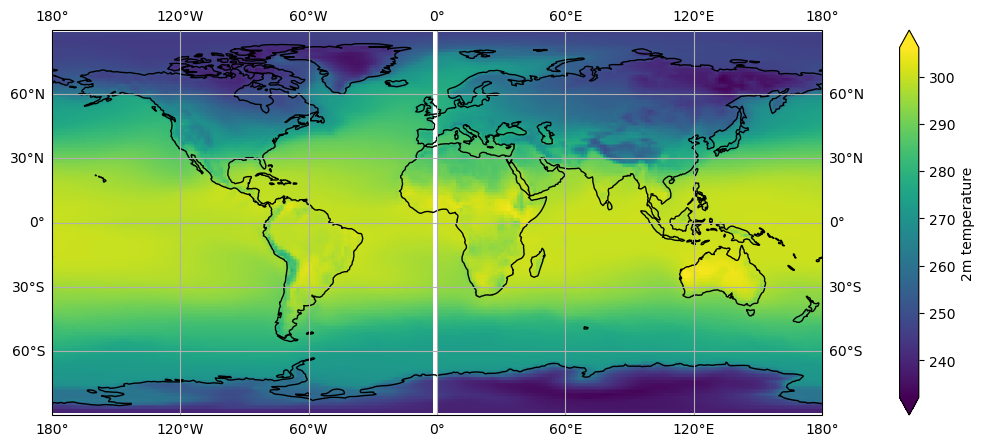

In [7]:
plot_map(lats, lons, clim["mu"].isel(date=0),"2m temperature")

## Mean of ensemble

In [31]:
folder = "/home/majanvie/scratch/data/train/EMOS"
file_path = "data_hindcast=0_forecast=0_20.nc"
mean_path = f"{folder}/mean/{file_path}"
std_path = f"{folder}/std/{file_path}"
ds_mean = xr.open_dataset(mean_path)
ds_mean = ds_mean["2m_temperature"]
ds_std = xr.open_dataset(std_path)
ds_std = ds_std["2m_temperature"]

FileNotFoundError: [Errno 2] No such file or directory: b'/home/majanvie/scratch/data/train/EMOS/mean/data_hindcast=0_forecast=0_20.nc'

In [14]:
ds.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 7)>
array([               0,  604800000000000, 1209600000000000, 1814400000000000,
       2419200000000000, 3024000000000000, 3369600000000000],
      dtype='timedelta64[ns]')
Coordinates:
    hindcast_year         int32 ...
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 0 days ... 3...
    level                 int32 ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

In [33]:
truth.longitude

<xarray.DataArray 'longitude' (longitude: 240)> Size: 2kB
array([  0. ,   1.5,   3. , ..., 355.5, 357. , 358.5])
Coordinates:
  * longitude  (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5

In [5]:
lats = ds_mean["latitude"].values
lons = ds_mean["longitude"].values

In [12]:
def plot_map(lats, lons, data, name, cmap='viridis'):
    plt.figure(figsize=(20, 5))
    buffer = 0.01
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Calculate extent with buffer to avoid identical limits
    lon_min, lon_max = lons.min(), lons.max()
    lat_min, lat_max = lats.min(), lats.max()
    # extent = [lon_min, lon_max, lat_min - buffer, lat_max + buffer]
    
    # ax.set_extent(extent, crs=ccrs.PlateCarree())

    
    # Plot data
    im = ax.imshow(data, origin='lower', extent=[lon_min, lon_max+1.5, lat_min, lat_max], transform=ccrs.PlateCarree(), cmap=cmap)
    ax.coastlines()
    plt.colorbar(im, label=name, extend='both')
    ax.gridlines(draw_labels=True)
    plt.show()
    

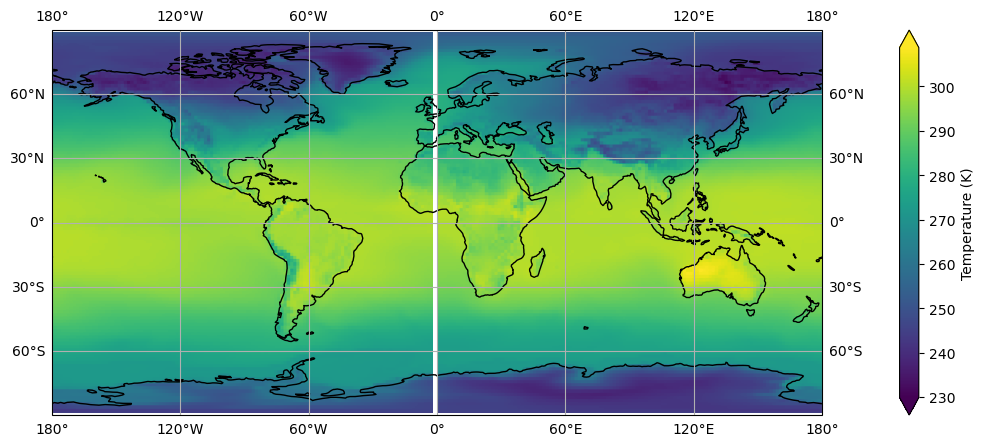

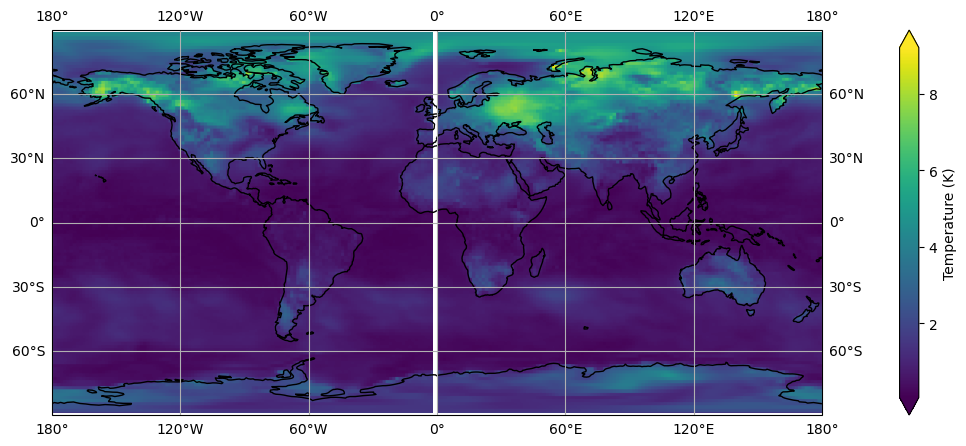

In [10]:
plot_map(lats,lons,ds_mean.isel(forecast_time=0, prediction_timedelta=2).values, "Temperature (K)")
plot_map(lats,lons,ds_std.isel(forecast_time=0, prediction_timedelta=2).values, "Temperature (K)")

(array([[56., 44., 13., ...,  0.,  0.,  0.],
        [54., 47., 11., ...,  0.,  0.,  0.],
        [57., 44., 10., ...,  0.,  0.,  0.],
        ...,
        [52., 59.,  1., ...,  0.,  0.,  0.],
        [50., 54.,  8., ...,  0.,  0.,  0.],
        [53., 54.,  5., ...,  0.,  0.,  0.]]),
 array([0.05534304, 0.97030902, 1.88527501, 2.80024099, 3.71520686,
        4.63017273, 5.54513884, 6.46010494, 7.37507105, 8.29003716,
        9.20500278]),
 <a list of 240 BarContainer objects>)

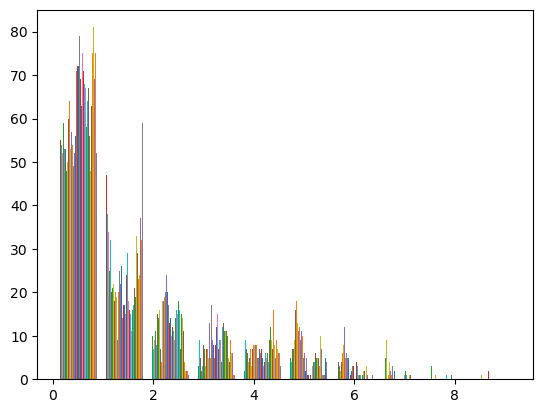

In [12]:
std_00 = ds_std.isel(forecast_time=0, prediction_timedelta=2).values
plt.hist(std_00)

In [13]:
std_00

array([[1.6357241, 1.6357241, 1.6357241, ..., 1.6357241, 1.6357241,
        1.6357241],
       [1.4841791, 1.4824944, 1.48139  , ..., 1.4851345, 1.4845785,
        1.4841301],
       [1.4531996, 1.4403446, 1.4278688, ..., 1.4665538, 1.4612559,
        1.4568341],
       ...,
       [4.7138367, 4.735979 , 4.760292 , ..., 4.6120267, 4.6437354,
        4.6776423],
       [4.4790115, 4.487186 , 4.4956183, ..., 4.456687 , 4.4636636,
        4.471366 ],
       [4.3406153, 4.3406153, 4.3406153, ..., 4.3406153, 4.3406153,
        4.3406153]], dtype=float32)

## Standardize data

In [132]:
mean = xr.open_dataset("../data_hindcast=0_forecast=0_20.nc")
mean

<xarray.Dataset> Size: 1GB
Dimensions:                                (forecast_time: 20,
                                            prediction_timedelta: 7,
                                            latitude: 121, longitude: 240)
Coordinates:
  * forecast_time                          (forecast_time) datetime64[ns] 160B ...
    hindcast_year                          int32 4B ...
  * latitude                               (latitude) float32 484B -90.0 ... ...
  * longitude                              (longitude) float32 960B 0.0 ... 3...
  * prediction_timedelta                   (prediction_timedelta) timedelta64[ns] 56B ...
    time                                   (forecast_time) datetime64[ns] 160B ...
    valid_time                             (forecast_time, prediction_timedelta) datetime64[ns] 1kB ...
    level                                  int32 4B ...
Data variables: (12/66)
    2m_dewpoint_temperature                (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    2m_temperature                         (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    2m_temperature_max                     (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    2m_temperature_min                     (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    convective_available_potential_energy  (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    sea_ice_cover                          (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    ...                                     ...
    geopotential_1000                      (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    specific_humidity_1000                 (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    temperature_1000                       (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    u_component_of_wind_1000               (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    v_component_of_wind_1000               (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...
    10m_wind_speed                         (forecast_time, prediction_timedelta, latitude, longitude) float32 16MB ...

In [133]:
# mean and std of file for all variables 
data = xr.open_dataset("../data_hindcast=0_forecast=0_20.nc").isel(prediction_timedelta=1)
# mean without considering NaN values
mean_data = data.mean(dim="forecast_time", skipna=True)
#mean_data = data.mean(dim="forecast_time")
mean_data


<xarray.Dataset> Size: 8MB
Dimensions:                                (latitude: 121, longitude: 240)
Coordinates:
    hindcast_year                          int32 4B ...
  * latitude                               (latitude) float32 484B -90.0 ... ...
  * longitude                              (longitude) float32 960B 0.0 ... 3...
    prediction_timedelta                   timedelta64[ns] 8B 7 days
    level                                  int32 4B ...
Data variables: (12/66)
    2m_dewpoint_temperature                (latitude, longitude) float32 116kB ...
    2m_temperature                         (latitude, longitude) float32 116kB ...
    2m_temperature_max                     (latitude, longitude) float32 116kB ...
    2m_temperature_min                     (latitude, longitude) float32 116kB ...
    convective_available_potential_energy  (latitude, longitude) float32 116kB ...
    sea_ice_cover                          (latitude, longitude) float32 116kB ...
    ...                                     ...
    geopotential_1000                      (latitude, longitude) float32 116kB ...
    specific_humidity_1000                 (latitude, longitude) float32 116kB ...
    temperature_1000                       (latitude, longitude) float32 116kB ...
    u_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    v_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    10m_wind_speed                         (latitude, longitude) float32 116kB ...

In [16]:
xr.open_dataset("../data_hindcast=0_forecast=0_20.nc").mean(dim=["forecast_time", "prediction_timedelta"], skipna=True)

<xarray.Dataset> Size: 8MB
Dimensions:                                (latitude: 121, longitude: 240)
Coordinates:
    hindcast_year                          int32 4B ...
  * latitude                               (latitude) float32 484B -90.0 ... ...
  * longitude                              (longitude) float32 960B 0.0 ... 3...
    level                                  int32 4B ...
Data variables: (12/66)
    2m_dewpoint_temperature                (latitude, longitude) float32 116kB ...
    2m_temperature                         (latitude, longitude) float32 116kB ...
    2m_temperature_max                     (latitude, longitude) float32 116kB ...
    2m_temperature_min                     (latitude, longitude) float32 116kB ...
    convective_available_potential_energy  (latitude, longitude) float32 116kB ...
    sea_ice_cover                          (latitude, longitude) float32 116kB ...
    ...                                     ...
    geopotential_1000                      (latitude, longitude) float32 116kB ...
    specific_humidity_1000                 (latitude, longitude) float32 116kB ...
    temperature_1000                       (latitude, longitude) float32 116kB ...
    u_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    v_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    10m_wind_speed                         (latitude, longitude) float32 116kB ...

In [34]:
std_data = data.std(dim="forecast_time", skipna=True)
std_data

<xarray.Dataset> Size: 54MB
Dimensions:                                (prediction_timedelta: 7,
                                            latitude: 121, longitude: 240)
Coordinates:
    hindcast_year                          int32 4B ...
  * latitude                               (latitude) float32 484B -90.0 ... ...
  * longitude                              (longitude) float32 960B 0.0 ... 3...
  * prediction_timedelta                   (prediction_timedelta) timedelta64[ns] 56B ...
    level                                  int32 4B ...
Data variables: (12/66)
    2m_dewpoint_temperature                (prediction_timedelta, latitude, longitude) float32 813kB ...
    2m_temperature                         (prediction_timedelta, latitude, longitude) float32 813kB ...
    2m_temperature_max                     (prediction_timedelta, latitude, longitude) float32 813kB ...
    2m_temperature_min                     (prediction_timedelta, latitude, longitude) float32 813kB ...
    convective_available_potential_energy  (prediction_timedelta, latitude, longitude) float32 813kB ...
    sea_ice_cover                          (prediction_timedelta, latitude, longitude) float32 813kB ...
    ...                                     ...
    geopotential_1000                      (prediction_timedelta, latitude, longitude) float32 813kB ...
    specific_humidity_1000                 (prediction_timedelta, latitude, longitude) float32 813kB ...
    temperature_1000                       (prediction_timedelta, latitude, longitude) float32 813kB ...
    u_component_of_wind_1000               (prediction_timedelta, latitude, longitude) float32 813kB ...
    v_component_of_wind_1000               (prediction_timedelta, latitude, longitude) float32 813kB ...
    10m_wind_speed                         (prediction_timedelta, latitude, longitude) float32 813kB ...

In [38]:
std_data.to_array().values

array([[[[6.2844524 , 6.2844524 , 6.2844524 , ..., 6.2844524 ,
          6.2844524 , 6.2844524 ],
         [6.836007  , 6.8531895 , 6.8703856 , ..., 6.789055  ,
          6.8046045 , 6.8203354 ],
         [7.357687  , 7.3888416 , 7.420182  , ..., 7.232376  ,
          7.2758083 , 7.3166404 ],
         ...,
         [3.3936448 , 3.4138877 , 3.4354966 , ..., 3.3182406 ,
          3.3424165 , 3.367432  ],
         [3.1500695 , 3.1565278 , 3.1632059 , ..., 3.127121  ,
          3.1345627 , 3.1422868 ],
         [3.0656657 , 3.0656657 , 3.0656657 , ..., 3.0656657 ,
          3.0656657 , 3.0656657 ]],

        [[6.305014  , 6.305014  , 6.305014  , ..., 6.305014  ,
          6.305014  , 6.305014  ],
         [6.504032  , 6.517872  , 6.5317473 , ..., 6.463632  ,
          6.4770384 , 6.4905734 ],
         [6.701225  , 6.7334743 , 6.76594   , ..., 6.5752873 ,
          6.6184163 , 6.6597548 ],
         ...,
         [3.0962136 , 3.1479135 , 3.2002718 , ..., 2.9208624 ,
          2.9785144 , 3.0

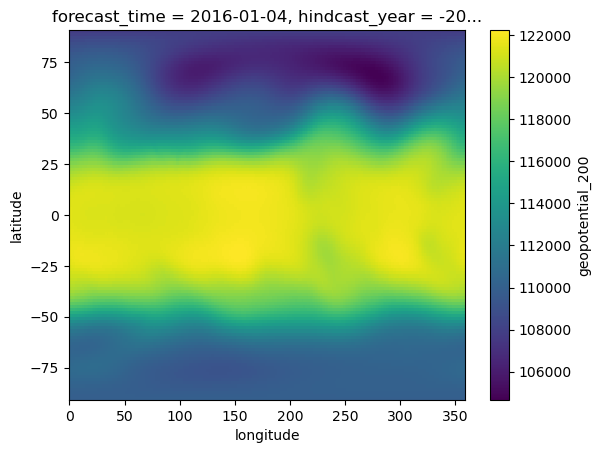

In [32]:
data["geopotential_200"].isel(forecast_time=0).plot()

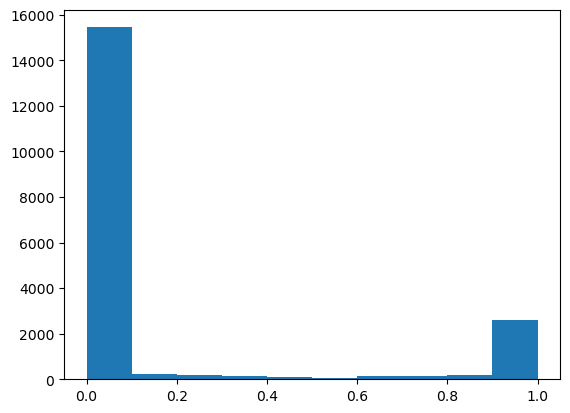

In [28]:
#plt.hist(mean_data["2m_temperature"].values.flatten())
plt.hist(mean_data["sea_ice_cover"].values.flatten())
plt.show()

In [3]:
import numpy as np
import json

In [4]:
# incrementally compute mean and variance
file_mean="../data_hindcast=0_forecast=0_20.nc"
lead_time_idx = 1
feature_count = 0
partial_means = None
partial_variances = None

data = xr.open_dataset(file_mean)
for forecast_idx_in_file in data.forecast_time.values:
    data_mean = data.isel(prediction_timedelta=lead_time_idx).sel(forecast_time=forecast_idx_in_file)
    data_mean = data_mean.fillna(0)  # Manage NaN values
    data_mean = data_mean.to_array().values  # (n_vars, n_lat, n_lon)

    # Flatten spatial dimensions (lat, lon) to one dimension
    data_mean = data_mean.reshape(data_mean.shape[0], -1)  # (n_vars, n_lat * n_lon)
    
    # Accumulate mean and variance statistics
    if partial_means is None:
        partial_means = np.mean(data_mean, axis=1)  # Mean for each feature
        partial_variances = np.var(data_mean, axis=1)  # Variance for each feature
        feature_count = data_mean.shape[1]
    else:
        new_mean = np.mean(data_mean, axis=1)
        new_variance = np.var(data_mean, axis=1)
        sample_count = data_mean.shape[1]

        # Update means and variances
        updated_feature_count = feature_count + sample_count
        partial_means = (partial_means * feature_count + new_mean * sample_count) / updated_feature_count
        partial_variances = ((feature_count * partial_variances + sample_count * new_variance) +
                                (feature_count * (partial_means - new_mean)**2) / updated_feature_count) / updated_feature_count
        feature_count = updated_feature_count

std_dev = np.sqrt(partial_variances)

In [11]:
import numpy as np
import xarray as xr
n_vars, n_lat, n_lon = 66, 121, 240

# Initialize cumulative arrays
cumulative_sum = np.zeros((n_vars, n_lat, n_lon))
cumulative_sum_of_squares = np.zeros((n_vars, n_lat, n_lon))
sample_count = 0

data = xr.open_dataset(file_mean)
for forecast_idx_in_file in data.forecast_time.values:
    data_mean = data.isel(prediction_timedelta=lead_time_idx).sel(forecast_time=forecast_idx_in_file)
    data_mean = data_mean.fillna(0)  # Manage NaN
    data_mean = data_mean.to_array().values  # (n_vars, n_lat, n_lon)

    # Update cumulative arrays
    cumulative_sum += data_mean
    cumulative_sum_of_squares += data_mean ** 2
    sample_count += 1

# Compute mean and standard deviation
mean = cumulative_sum / sample_count
variance = (cumulative_sum_of_squares / sample_count) - (mean ** 2)
std = np.sqrt(variance)


/var/folders/hd/6gcp429169ldrntwtps0b1_m0000gp/T/ipykernel_13902/447674433.py:24: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(variance)


In [12]:
mean

array([[[ 2.32128890e+02,  2.32128890e+02,  2.32128890e+02, ...,
          2.32128890e+02,  2.32128890e+02,  2.32128890e+02],
        [ 2.32548186e+02,  2.32504795e+02,  2.32461408e+02, ...,
          2.32684081e+02,  2.32638813e+02,  2.32593523e+02],
        [ 2.33184079e+02,  2.33067886e+02,  2.32951693e+02, ...,
          2.33601725e+02,  2.33461658e+02,  2.33322845e+02],
        ...,
        [ 2.43754667e+02,  2.43826157e+02,  2.43897620e+02, ...,
          2.43507853e+02,  2.43589789e+02,  2.43672228e+02],
        [ 2.42994261e+02,  2.43021301e+02,  2.43048349e+02, ...,
          2.42904247e+02,  2.42934262e+02,  2.42964257e+02],
        [ 2.42457475e+02,  2.42457475e+02,  2.42457475e+02, ...,
          2.42457475e+02,  2.42457475e+02,  2.42457475e+02]],

       [[ 2.35739291e+02,  2.35739291e+02,  2.35739291e+02, ...,
          2.35739291e+02,  2.35739291e+02,  2.35739291e+02],
        [ 2.36333972e+02,  2.36290618e+02,  2.36247388e+02, ...,
          2.36460098e+02,  2.36418093e

In [15]:
variance[np.where(variance < 0)]

array([-1.50587476e-09, -1.18846821e-10, -1.70397030e-12, ...,
       -9.62615304e-05, -4.19631906e-05, -1.65846053e-04])

In [32]:
data["2m_temperature"].isel(longitude=0, latitude=0).values.flatten().shape[0]

(140,)

In [30]:
nb_samples = 20*7

In [5]:
import numpy as np
import xarray as xr
n_vars, n_lat, n_lon = 66, 121, 240
# toy example with twice the same data
cumulative_sum = np.zeros((n_vars, n_lat, n_lon))
cumulative_sum_of_squares = np.zeros((n_vars, n_lat, n_lon))
sample_count = 0 # n 
running_mean_map = None
running_var_map = None
running_min_map = None
running_max_map = None
for k in range(2):
    data = xr.open_dataset(file_mean)
    new_nb_samples = data["2m_temperature"].isel(longitude=0, latitude=0).values.flatten().shape[0] # delta 
    print(new_nb_samples)
    #sample_count += new_nb_samples # n+delta 
    if sample_count == 0:
        # compute using xarray methods
        running_mean_map = data.mean(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        running_var_map = data.var(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        running_min_map = data.min(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        running_max_map = data.max(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        sample_count += new_nb_samples
    else:
        # compute new mean and variance
        new_data_mean = data.mean(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        new_data_var = data.var(dim=["forecast_time", "prediction_timedelta"]).to_array().values # Nan to zero to avoid warning 
        new_data_min = data.min(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        new_data_max = data.max(dim=["forecast_time", "prediction_timedelta"]).to_array().values
        
        # incremental mean and variance
        previous_mean_map = running_mean_map
        previous_var_map = running_var_map
        running_mean_map = (sample_count * running_mean_map + new_nb_samples * new_data_mean) / (sample_count + new_nb_samples)
        running_var_map = (sample_count * (previous_var_map + previous_mean_map**2) + 
                           new_nb_samples * (new_data_var + new_data_mean**2)) / (sample_count+ new_nb_samples) - running_mean_map**2          
        sample_count += new_nb_samples

        # min max 
        running_min_map = np.minimum(running_min_map, new_data_min)
        running_max_map = np.maximum(running_max_map, new_data_max)


# standard deviation
#running_std_map = np.sqrt(running_var_map)


140


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  re

140


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  re

In [125]:
# count elements negative in var
np.sum(running_var_map < 0)

1241

In [ ]:
running_var_map

In [24]:
lats, lons = data.latitude, data.longitude
true_mean = data.mean(dim=["forecast_time", "prediction_timedelta"], skipna=True)
true_mean
true_std = data.std(dim=["forecast_time", "prediction_timedelta"], skipna=True)
true_std

/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for

<xarray.Dataset> Size: 8MB
Dimensions:                                (latitude: 121, longitude: 240)
Coordinates:
    hindcast_year                          int32 4B ...
  * latitude                               (latitude) float32 484B -90.0 ... ...
  * longitude                              (longitude) float32 960B 0.0 ... 3...
    level                                  int32 4B ...
Data variables: (12/66)
    2m_dewpoint_temperature                (latitude, longitude) float32 116kB ...
    2m_temperature                         (latitude, longitude) float32 116kB ...
    2m_temperature_max                     (latitude, longitude) float32 116kB ...
    2m_temperature_min                     (latitude, longitude) float32 116kB ...
    convective_available_potential_energy  (latitude, longitude) float32 116kB ...
    sea_ice_cover                          (latitude, longitude) float32 116kB ...
    ...                                     ...
    geopotential_1000                      (latitude, longitude) float32 116kB ...
    specific_humidity_1000                 (latitude, longitude) float32 116kB ...
    temperature_1000                       (latitude, longitude) float32 116kB ...
    u_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    v_component_of_wind_1000               (latitude, longitude) float32 116kB ...
    10m_wind_speed                         (latitude, longitude) float32 116kB ...

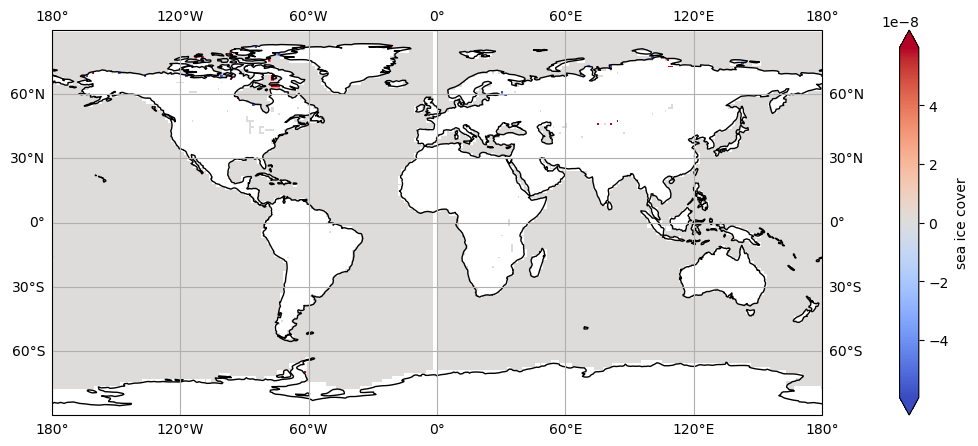

In [63]:
plot_map(data.latitude, data.longitude,running_mean_map[5] - true_mean["sea_ice_cover"], "sea ice cover", cmap="coolwarm")

In [61]:
diff = running_mean_map[5] - true_mean["sea_ice_cover"]
print(diff.min(), diff.max())

<xarray.DataArray 'sea_ice_cover' ()> Size: 8B
array(-0.98571426)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ... <xarray.DataArray 'sea_ice_cover' ()> Size: 8B
array(0.)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ...


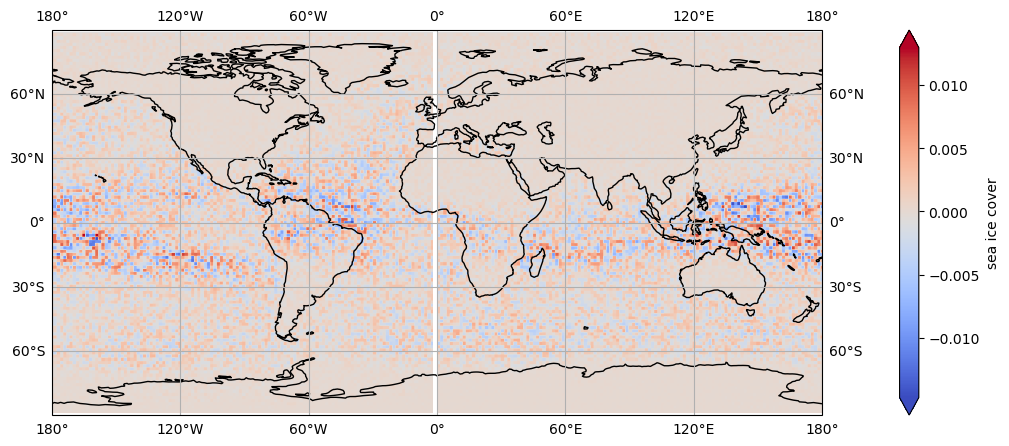

In [68]:
plot_map(lats, lons, running_std_map[1] - true_std["2m_temperature"], "sea ice cover", cmap="coolwarm")

In [70]:
diff = running_std_map[0] - true_std["2m_temperature"]
print(diff.min(), diff.max())

<xarray.DataArray '2m_temperature' ()> Size: 8B
array(-4.44048023)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ... <xarray.DataArray '2m_temperature' ()> Size: 8B
array(6.05108547)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ...


In [73]:
true_var = data.var(dim=["forecast_time", "prediction_timedelta"], skipna=True)

/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  re

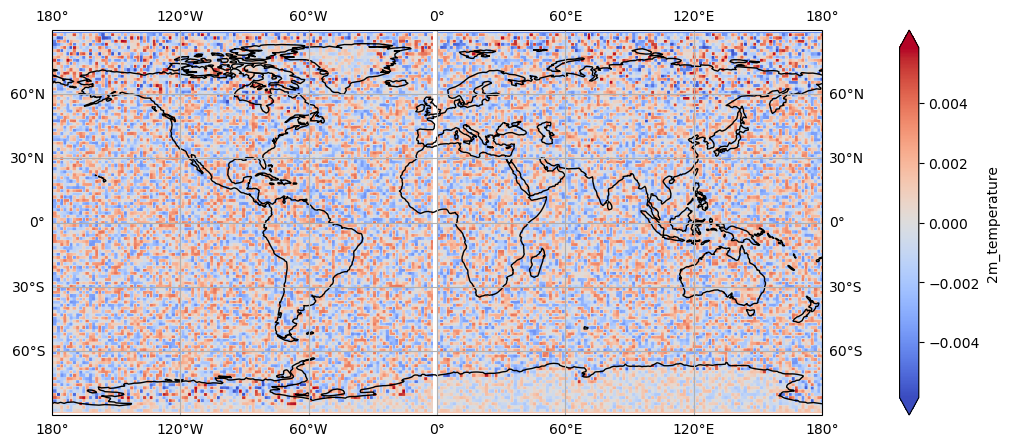

In [74]:
plot_map(lats, lons, running_var_map[1] - true_var["2m_temperature"], "2m_temperature", cmap="coolwarm")

In [75]:
diff = running_var_map[1] - true_var["2m_temperature"]
print(diff.min(), diff.max())

<xarray.DataArray '2m_temperature' ()> Size: 8B
array(-0.00585842)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ... <xarray.DataArray '2m_temperature' ()> Size: 8B
array(0.00585842)
Coordinates:
    hindcast_year  int32 4B ...
    level          int32 4B ...


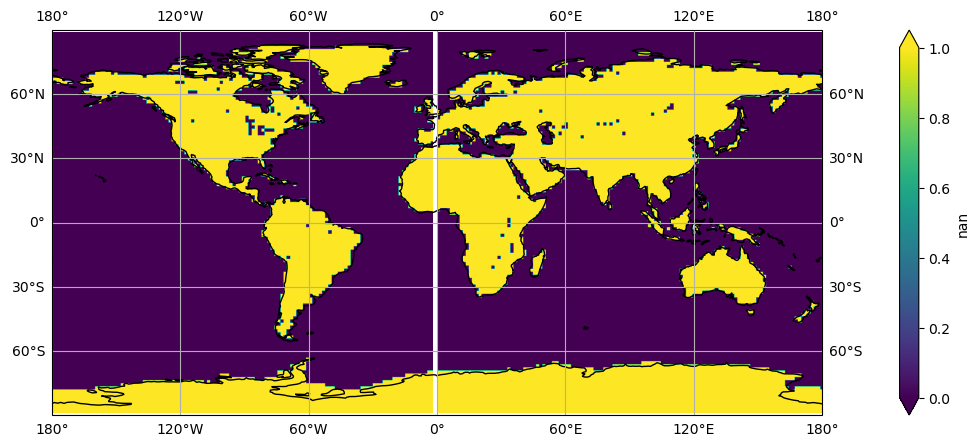

In [85]:
plot_map(lats, lons, np.isnan(running_var_map)[5], "nan")

In [6]:
# Nan processing
running_var_map = np.nan_to_num(running_var_map, nan=1.0)
# negative values (numerical instability)
running_var_map = np.where(running_var_map <= 0, 1.0, running_var_map)
np.isnan(running_var_map).sum() 

0

In [8]:
running_std_map_c = np.sqrt(running_var_map)
plot_map(lats, lons, running_std_map_c[1] - true_std["2m_temperature"], "2m_temperature", cmap="coolwarm")

NameError: name 'plot_map' is not defined

In [98]:
for i,var in enumerate(data.data_vars):
    true_mean = data[var].mean(dim=["forecast_time", "prediction_timedelta"], skipna=True)
    true_std = data[var].std(dim=["forecast_time", "prediction_timedelta"], skipna=True)
    diff_m = running_mean_map[i] - true_mean
    diff_s = running_std_map_c[i] - true_std
    print(var,diff_m.min().item(), diff_m.max().item(), diff_s.min().item(), diff_s.max().item())

2m_dewpoint_temperature 0.0 0.0 -0.019346706569194794 0.01635333150625229
2m_temperature 0.0 0.0 -0.01472194492816925 0.012955442070960999
2m_temperature_max 0.0 0.0 -0.014570176601409912 0.01333308219909668
2m_temperature_min 0.0 0.0 -0.012598380446434021 0.010891556739807129
convective_available_potential_energy 0.0 0.0 -0.00048828125 0.000274658203125


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


sea_ice_cover -5.960464477539063e-08 5.960464477539063e-08 -0.00028160595684312284 1.0
sea_surface_temperature 0.0 0.0 -0.062399040907621384 0.02582661807537079
skin_temperature 0.0 0.0 -0.01972585916519165 0.025366701185703278
snow_albedo -3.814697265625e-06 3.814697265625e-06 -0.014778230339288712 0.027063293382525444
snow_density -1.52587890625e-05 1.52587890625e-05 -0.024009110406041145 1.0


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


snow_depth 0.0 0.0 -1.5268434286117554 0.039897918701171875
soil_moisture_top_100cm -3.0517578125e-05 1.52587890625e-05 -0.08749744296073914 0.9998893141746521


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


soil_moisture_top_20cm -3.0517578125e-05 1.52587890625e-05 -0.08586596697568893 0.9981290698051453
soil_temperature_top_100cm -1.52587890625e-05 1.52587890625e-05 -0.0510406531393528 0.95111083984375


/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mayajanvier/anaconda3/envs/pangu/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


soil_temperature_top_20cm -1.52587890625e-05 1.52587890625e-05 -0.0598907470703125 0.9494247436523438
total_cloud_cover 0.0 0.0 -0.00015282630920410156 0.00012743473052978516
total_column_water 0.0 0.0 -5.638599395751953e-05 6.604194641113281e-05
total_precipitation_24hr 0.0 0.0 -3.3760443329811096e-09 2.3283064365386963e-09
geopotential_10 0.0 0.0 -5.333038330078125 5.350860595703125
temperature_10 0.0 0.0 -0.0007883310317993164 0.0008794069290161133
u_component_of_wind_10 0.0 0.0 -2.1219253540039062e-05 2.1696090698242188e-05
v_component_of_wind_10 0.0 0.0 -3.814697265625e-06 3.814697265625e-06
geopotential_50 0.0 0.0 -7.7566680908203125 7.343414306640625
temperature_50 0.0 0.0 -0.001701951026916504 0.0017608404159545898
u_component_of_wind_50 0.0 0.0 -5.7220458984375e-06 4.76837158203125e-06
v_component_of_wind_50 0.0 0.0 -2.86102294921875e-06 2.86102294921875e-06
geopotential_100 0.0 0.0 -4.201194763183594 4.062187194824219
temperature_100 0.0 0.0 -0.002362757921218872 0.0021082162

In [9]:
# standardize
data = xr.open_dataset(file_mean)
standard = (data.isel(forecast_time=0, prediction_timedelta=1).to_array().values - running_mean_map)/running_std_map_c
standard = np.nan_to_num(standard, nan=0.0)
plot_map(lats, lons, standard[5], "sea ice cover", cmap="coolwarm")

NameError: name 'plot_map' is not defined

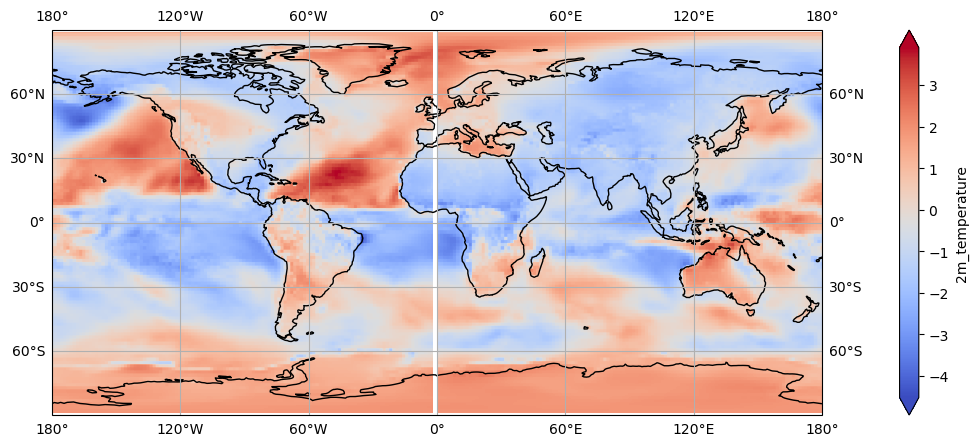

In [114]:
plot_map(lats, lons, standard[1], "2m_temperature", cmap="coolwarm")

In [121]:
for i,var in enumerate(data.data_vars):
    print(var, standard[i].min().item(), standard[i].max().item())

2m_dewpoint_temperature -4.366571426391602 3.4843311309814453
2m_temperature -4.519559860229492 3.9015090465545654
2m_temperature_max -4.193116664886475 3.9124348163604736
2m_temperature_min -4.662945747375488 3.7689850330352783
convective_available_potential_energy -3.0220518112182617 7.876674175262451
sea_ice_cover -8.367431640625 8.98027515411377
sea_surface_temperature -4.683791637420654 5.65351676940918
skin_temperature -4.5653076171875 3.7933349609375
snow_albedo -3.9005908966064453 3.889979362487793
snow_density -4.985346794128418 4.461364269256592
snow_depth -3.2631146907806396 6.479093551635742
soil_moisture_top_100cm -4.815067291259766 4.872443199157715
soil_moisture_top_20cm -3.9424197673797607 4.2937092781066895
soil_temperature_top_100cm -3.5698421001434326 3.454163074493408
soil_temperature_top_20cm -3.888841152191162 3.639230251312256
total_cloud_cover -4.590428829193115 5.02134370803833
total_column_water -4.248728275299072 4.310121059417725
total_precipitation_24hr -3.

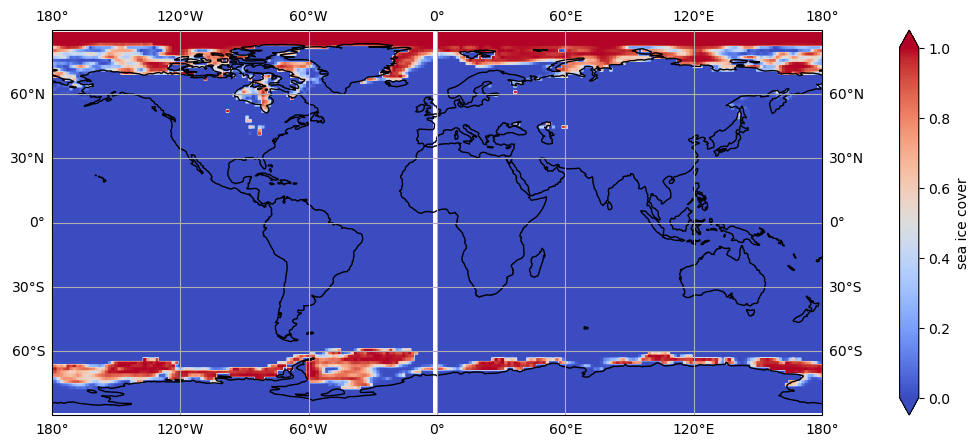

In [140]:
# standardize min max 
data = xr.open_dataset(file_mean)
diff = running_max_map - running_min_map
diff = np.where(diff == 0, 1.0, diff)
standard = (data.isel(forecast_time=0, prediction_timedelta=1).to_array().values - running_min_map)/diff
standard = np.nan_to_num(standard, nan=0.0)
plot_map(lats, lons, standard[5], "sea ice cover", cmap="coolwarm")

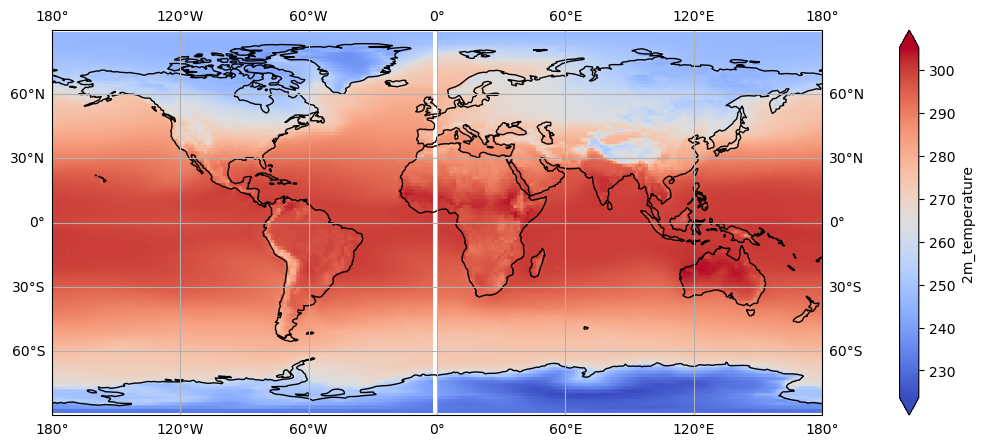

In [141]:
plot_map(lats, lons, true_mean["2m_temperature"], "2m_temperature", cmap="coolwarm")

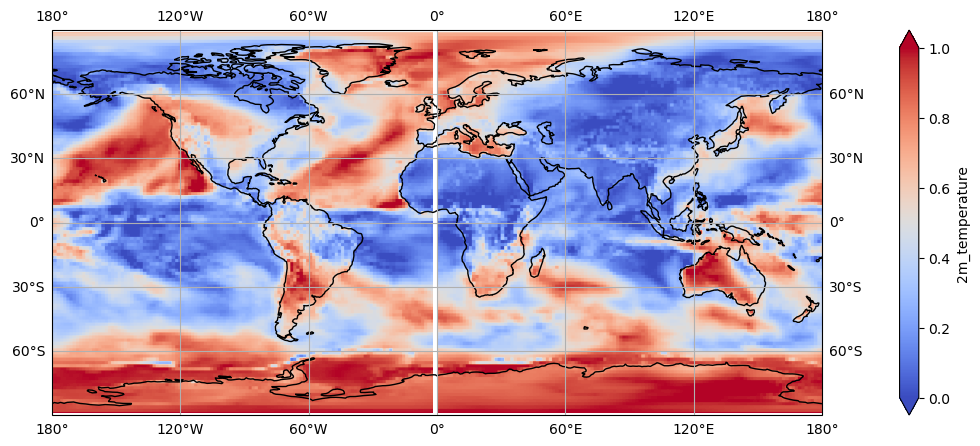

In [142]:
plot_map(lats, lons, standard[1], "2m_temperature", cmap="coolwarm")

In [35]:
true_mean.latitude

<xarray.DataArray 'latitude' (latitude: 121)> Size: 484B
array([-90. , -88.5, -87. , -85.5, -84. , -82.5, -81. , -79.5, -78. , -76.5,
       -75. , -73.5, -72. , -70.5, -69. , -67.5, -66. , -64.5, -63. , -61.5,
       -60. , -58.5, -57. , -55.5, -54. , -52.5, -51. , -49.5, -48. , -46.5,
       -45. , -43.5, -42. , -40.5, -39. , -37.5, -36. , -34.5, -33. , -31.5,
       -30. , -28.5, -27. , -25.5, -24. , -22.5, -21. , -19.5, -18. , -16.5,
       -15. , -13.5, -12. , -10.5,  -9. ,  -7.5,  -6. ,  -4.5,  -3. ,  -1.5,
         0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,  13.5,
        15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,  27. ,  28.5,
        30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,  40.5,  42. ,  43.5,
        45. ,  46.5,  48. ,  49.5,  51. ,  52.5,  54. ,  55.5,  57. ,  58.5,
        60. ,  61.5,  63. ,  64.5,  66. ,  67.5,  69. ,  70.5,  72. ,  73.5,
        75. ,  76.5,  78. ,  79.5,  81. ,  82.5,  84. ,  85.5,  87. ,  88.5,
        90. ], dtype=float32)
Coordinates:
    hindcast_year  int32 4B ...
  * latitude       (latitude) float32 484B -90.0 -88.5 -87.0 ... 87.0 88.5 90.0
    level          int32 4B ...

# UNet

In [36]:
from model import DRUnet
import torch
model = DRUnet(standard.shape[0], 4)
input = torch.tensor([standard[:,1:,:]], dtype=torch.float)
output = model(input)
output

tensor([[[[0.1634, 0.5959, 0.2509,  ..., 0.0000, 0.0000, 0.5442],
          [0.0993, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1009],
          [0.0921, 0.0000, 0.0000,  ..., 0.0000, 0.1719, 0.1651],
          ...,
          [0.9931, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.2090, 0.0000, 0.0000,  ..., 0.0000, 0.1062, 0.0000],
          [0.2903, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.1069,  ..., 0.0000, 0.1164, 0.0000],
          [0.0000, 0.6642, 0.7549,  ..., 0.6538, 0.3759, 0.0103],
          [0.0000, 0.0000, 0.0000,  ..., 0.4030, 1.2428, 0.0000],
          ...,
          [1.1723, 0.0000, 0.5081,  ..., 0.0000, 0.0000, 0.0000],
          [0.3572, 0.5498, 0.8899,  ..., 1.1864, 0.1663, 0.1441],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3285, 0.2447, 0.5546,  ..., 1.9078, 0.3319, 0.6608],
          [0.2759, 0.2375, 0.4690,  ..., 0.0000, 0.0000, 0.4831],
          [0.0000, 0.0028, 0.0000,  ..., 0

In [31]:
output.shape

torch.Size([1, 4, 120, 240])

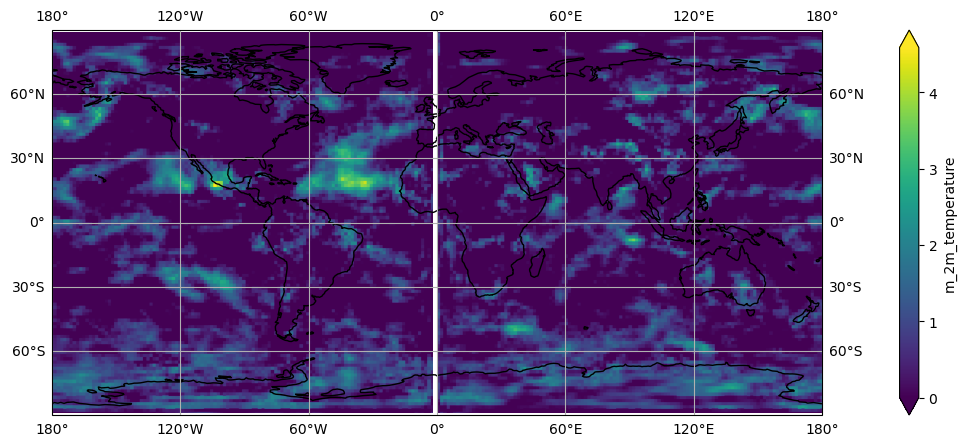

In [37]:
plot_map(lats, lons, output[0,0].detach().numpy(), "m_2m_temperature")

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class DRUnet(nn.Module):
    """Distributional regression U-Net from Pic et al.:
    Inputs: size 121x240 with 66 channels
    Architecture:
        - 2 decreasing resolution blocks, 2 increasing resolution blocks 
        with skip connections
        - Latent layers: 3x3 conv, BN, ReLU
        - Down blocks: twice 3x3 conv, BN, ReLU + 2x2 max pooling
        - Up blocks: bilinear upsampling+ twice 3x3 conv, BN, ReLU"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        # layers
        self.layer1_down = nn.Sequential(
            nn.Conv2d(in_channels, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        self.layer2_down = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.latent = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer3_up = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        self.layer4_up = nn.Sequential(
            nn.Conv2d(32, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        
        # up and down scalers
        self.down1 = nn.MaxPool2d(2) # max pooling
        self.down2 = nn.MaxPool2d(2) # max pooling
        self.up1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True) #bilinear upsampling 
        self.up2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True) #bilinear upsampling

    def forward(self, x):
        # down
        x1 = self.layer1_down(x) # keep for skip connection
        x2 = self.down1(x1)
        x3 = self.layer2_down(x2) # keep for skip connection
        x4 = self.down2(x3)
        # latent
        x5 = self.latent(x4)
        # up
        x6 = self.up1(x5)
        x7 = self.layer3_up(x6 + x3) # skip connection
        x8 = self.up2(x7)
        x9 = self.layer4_up(x8+ x1) # skip connection
        return x9

In [28]:
import torchsummary
model = DRUnet(standard.shape[0], 4)
torchsummary.summary(model, input_size=(standard.shape[0], 120, 240))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 120, 240]          19,040
       BatchNorm2d-2         [-1, 32, 120, 240]              64
              ReLU-3         [-1, 32, 120, 240]               0
            Conv2d-4         [-1, 32, 120, 240]           9,248
       BatchNorm2d-5         [-1, 32, 120, 240]              64
              ReLU-6         [-1, 32, 120, 240]               0
         MaxPool2d-7          [-1, 32, 60, 120]               0
            Conv2d-8          [-1, 64, 60, 120]          18,496
       BatchNorm2d-9          [-1, 64, 60, 120]             128
             ReLU-10          [-1, 64, 60, 120]               0
           Conv2d-11          [-1, 64, 60, 120]          36,928
      BatchNorm2d-12          [-1, 64, 60, 120]             128
             ReLU-13          [-1, 64, 60, 120]               0
        MaxPool2d-14           [-1, 64,

# Detrending data

In [1]:
# download truth data
import os
import xarray as xr
print("Extracting observation data:")
obs_folder = "/Users/mayajanvier/Desktop/ARCHES/S2S_weather/obs"
forecast_train = xr.open_zarr("gs://weatherbench2/datasets/ifs_extended_range/weekly/ifs-ext-reforecast-pressure-levels-weekly_avg_ens_mean.zarr")
forecast_test = xr.open_zarr("gs://weatherbench2/datasets/ifs_extended_range/weekly/ifs-ext-pressure-levels-weekly_avg_ens_mean.zarr")
obs = xr.open_zarr("gs://weatherbench2/datasets/era5_weekly/1959-2023_01_10-1h-240x121_equiangular_with_poles_conservative.zarr")
obs_variables = [
        "2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind"
    ]
obs = obs[obs_variables]
t_min = min(forecast_train.valid_time.compute().values.min(), forecast_test.valid_time.compute().values.min())
t_max = max(forecast_train.valid_time.compute().values.max(), forecast_test.valid_time.compute().values.max())
obs = obs.sel(time=slice(t_min, t_max))
for var in obs_variables:
    if not os.path.exists(f"{obs_folder}/{var}.nc"):
        obs_var = obs[var]
        obs_var.to_netcdf(f"{obs_folder}/{var}.nc")

Extracting observation data:


In [2]:
temp_era = xr.open_dataset(f"{obs_folder}/2m_temperature.nc")
temp_era

<xarray.Dataset> Size: 1GB
Dimensions:         (latitude: 121, longitude: 240, time: 9863)
Coordinates:
  * latitude        (latitude) float64 968B -90.0 -88.5 -87.0 ... 87.0 88.5 90.0
  * longitude       (longitude) float64 2kB 0.0 1.5 3.0 ... 355.5 357.0 358.5
  * time            (time) datetime64[ns] 79kB 1996-01-04 ... 2023-01-04
Data variables:
    2m_temperature  (time, longitude, latitude) float32 1GB ...

In [13]:
temp_era.isel(time=0).to_array().values.shape

(1, 240, 121)

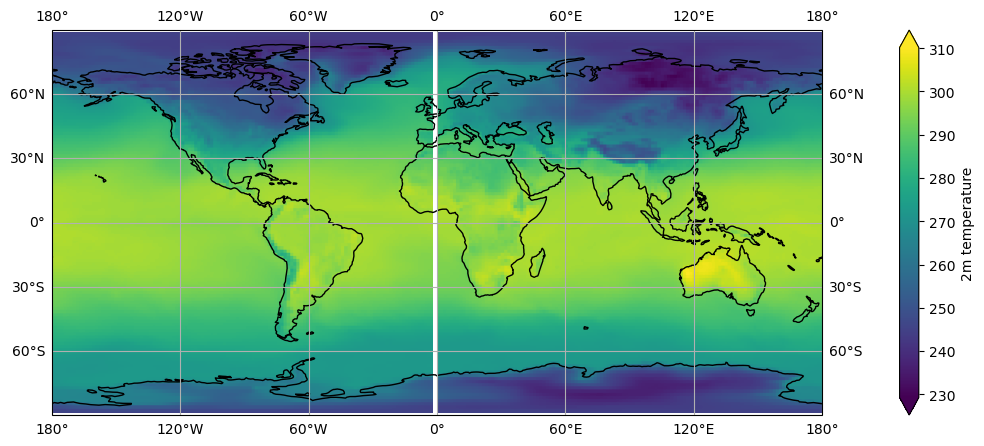

In [16]:
# plot temp time=0
plot_map(temp_era.latitude, temp_era.longitude, temp_era.isel(time=0).to_array().values[0].T, "2m temperature")

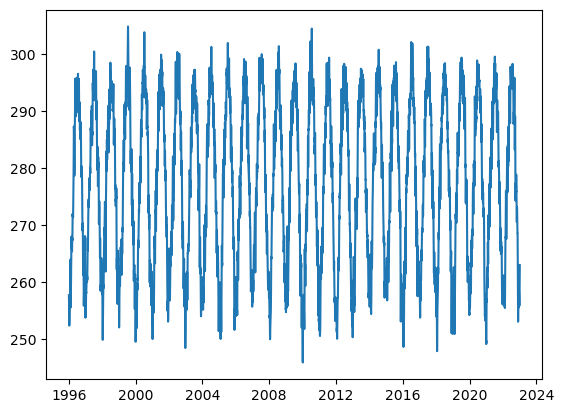

In [48]:
point_series = temp_era.sel(latitude=45, longitude=-73+180, method="nearest").to_array().values[0]
times = temp_era.time.values
plt.plot(times,point_series)
plt.show()

In [33]:
num_times

Index([ 820713600000000000,  820800000000000000,  820886400000000000,
        820972800000000000,  821059200000000000,  821145600000000000,
        821232000000000000,  821318400000000000,  821404800000000000,
        821491200000000000,
       ...
       1672012800000000000, 1672099200000000000, 1672185600000000000,
       1672272000000000000, 1672358400000000000, 1672444800000000000,
       1672531200000000000, 1672617600000000000, 1672704000000000000,
       1672790400000000000],
      dtype='int64', length=9863)

[ 820713600000000000  820800000000000000  820886400000000000 ...
 1672617600000000000 1672704000000000000 1672790400000000000]


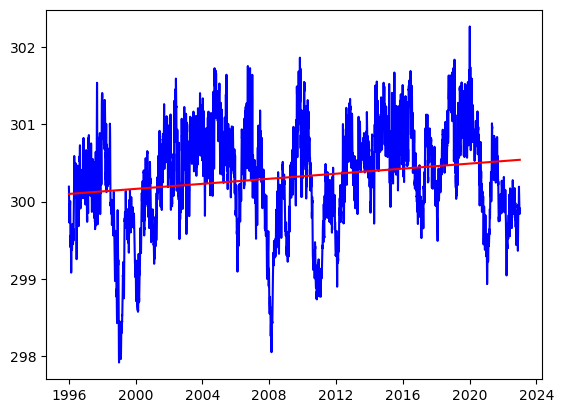

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np 

num_times = np.array(pd.to_datetime(times).astype(np.int64))
X = num_times.reshape(-1, 1)
model = LinearRegression()
model.fit(X, point_series)

# Get the trend
trend = model.predict(X)

# Plot the data and the trend
plt.plot(times, point_series, color='blue')
plt.plot(times, trend, color='red')
plt.show()

In [39]:
# get parameters of the model, 
slope = model.coef_[0] # pente
intercept = model.intercept_ # biais
print(slope, intercept)

5.187093546216332e-19 299.6725303675434


In [45]:
slope * 60 * 60 * 24 * 365 *1e9

0.016358018207347825

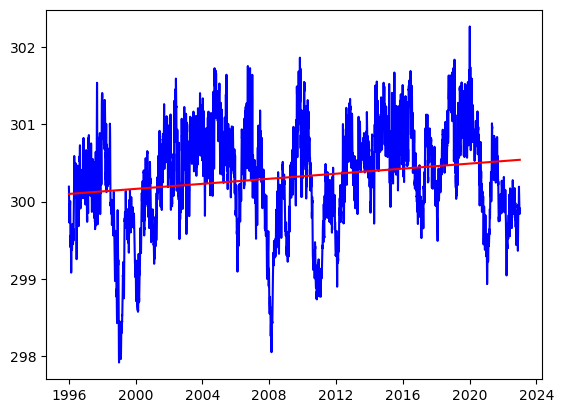

In [42]:
plt.plot(times, point_series, color='blue')
plt.plot(times, slope*num_times + intercept, color='red')

In [3]:
# wind
from processings.format_data import compute_wind_speedxr
truth = xr.open_mfdataset("obs/*.nc")
compute_wind_speedxr(truth, "obs")
truth

<xarray.Dataset> Size: 5GB
Dimensions:                  (latitude: 121, longitude: 240, time: 9863)
Coordinates:
  * latitude                 (latitude) float64 968B -90.0 -88.5 ... 88.5 90.0
  * longitude                (longitude) float64 2kB 0.0 1.5 3.0 ... 357.0 358.5
  * time                     (time) datetime64[ns] 79kB 1996-01-04 ... 2023-0...
Data variables:
    10m_u_component_of_wind  (time, longitude, latitude) float32 1GB dask.array<chunksize=(9863, 240, 121), meta=np.ndarray>
    10m_v_component_of_wind  (time, longitude, latitude) float32 1GB dask.array<chunksize=(9863, 240, 121), meta=np.ndarray>
    2m_temperature           (time, longitude, latitude) float32 1GB dask.array<chunksize=(9863, 240, 121), meta=np.ndarray>
    10m_wind_speed           (time, longitude, latitude) float32 1GB dask.array<chunksize=(9863, 240, 121), meta=np.ndarray>

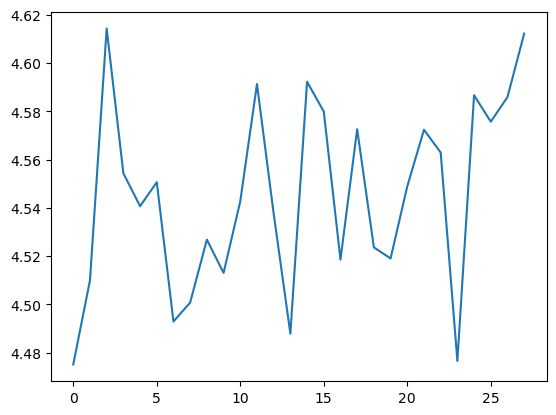

In [58]:
# plot yearly mean of wind speed
wind_speed = truth["10m_wind_speed"]
wind_speed = wind_speed.groupby("time.year").mean(dim=["time", "latitude", "longitude"])
plt.plot(wind_speed)

In [16]:
# detrend temperature at all grid points individually
from sklearn.linear_model import LinearRegression
import numpy as np
import xarray as xr
import pandas as pd 

times = truth.time.values
num_times = np.array(pd.to_datetime(times).astype(np.int64))*1e-9 # convert to seconds
print(num_times.shape)
X = num_times.reshape(-1, 1)
temp_era = truth["2m_temperature"].values  # shape should be (time, lat, lon)

# Reshape temperature data to fit the model
temp_reshaped = temp_era.reshape(temp_era.shape[0], -1)  # shape (time, lat*lon)

# Fit the model
model = LinearRegression()
model.fit(X, temp_reshaped)

# Extract the slopes and intercepts
slopes = model.coef_.reshape(temp_era.shape[1], temp_era.shape[2])  # shape (lat, lon)
intercepts = model.intercept_.reshape(temp_era.shape[1], temp_era.shape[2])  # shape (lat, lon)

print(slopes)

(9863,)
[[1.10074045e-09 1.25167312e-09 1.41790958e-09 ... 1.90900150e-09
  2.32611934e-09 2.44584220e-09]
 [1.10293615e-09 1.25918671e-09 1.42886532e-09 ... 1.91286276e-09
  2.32812368e-09 2.44830317e-09]
 [1.10516254e-09 1.26700298e-09 1.43897393e-09 ... 1.91624575e-09
  2.32993122e-09 2.45082559e-09]
 ...
 [1.09385929e-09 1.22764050e-09 1.36775553e-09 ... 1.88826888e-09
  2.30776374e-09 2.43797452e-09]
 [1.09619917e-09 1.23610103e-09 1.38505980e-09 ... 1.89356705e-09
  2.31445358e-09 2.44052955e-09]
 [1.09849519e-09 1.24408129e-09 1.40191706e-09 ... 1.90126449e-09
  2.32085224e-09 2.44318432e-09]]


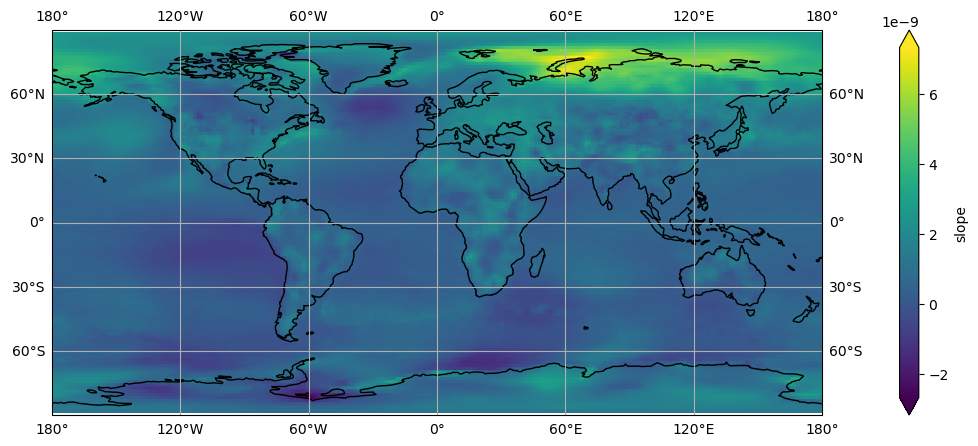

In [35]:
plot_map(truth.latitude, truth.longitude, slopes.T, "slope")

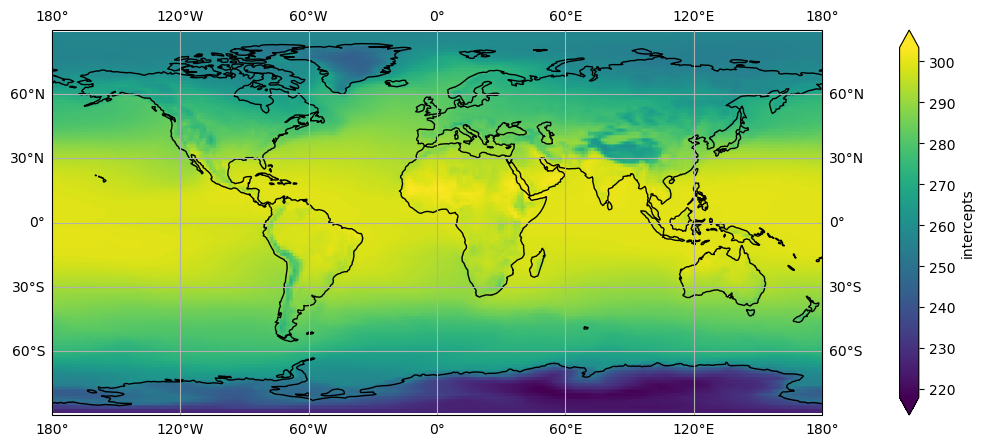

In [36]:
plot_map(truth.latitude, truth.longitude, intercepts.T, "intercepts")

In [62]:
# detrend train data
mean = xr.open_dataset("../data_hindcast=0_forecast=0_20.nc")
train_temp = mean["2m_temperature"].isel(prediction_timedelta=0)
train_times = train_temp.valid_time.values
num_times = np.array(pd.to_datetime(train_times).astype(np.int64))# convert to seconds
X = num_times.reshape(-1, 1)
train_temp = train_temp.values  # shape should be (time, lat, lon)
model = LinearRegression()
model.fit(X, train_temp.reshape(train_temp.shape[0], -1))


LinearRegression()

In [58]:
slopes = model.coef_.reshape(train_temp.shape[1], train_temp.shape[2])  # shape (lat, lon)
intercepts = model.intercept_.reshape(train_temp.shape[1], train_temp.shape[2])  # shape (lat, lon)

In [59]:
trend = model.predict(X)
trend = trend.reshape(train_temp.shape)
trend.shape

(20, 121, 240)

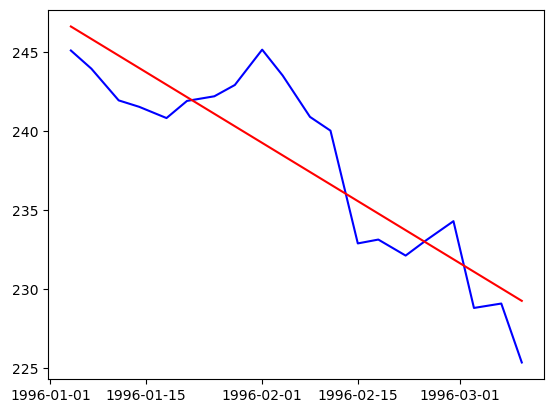

In [60]:

# Plot the data and the trend
plt.plot(train_times, train_temp[:,0,0], color='blue')
plt.plot(train_times, trend[:,0,0], color='red')
plt.show()

In [61]:
intercepts

array([[2745.59262334, 2745.59262334, 2745.59262334, ..., 2745.59262334,
        2745.59262334, 2745.59262334],
       [2908.15370464, 2916.38810156, 2924.61423622, ..., 2886.35263935,
        2893.64506917, 2900.88690993],
       [3078.22202024, 3096.38482703, 3114.54821859, ..., 3024.6005286 ,
        3043.05009594, 3060.64324208],
       ...,
       [ 909.14846985,  914.99416632,  920.85314857, ...,  891.55358656,
         898.49083375,  903.82569714],
       [ 988.90415664,  990.69073017,  992.43708543, ...,  983.20389203,
         985.0828103 ,  987.0449834 ],
       [ 957.4519604 ,  957.4519604 ,  957.4519604 , ...,  957.4519604 ,
         957.4519604 ,  957.4519604 ]])

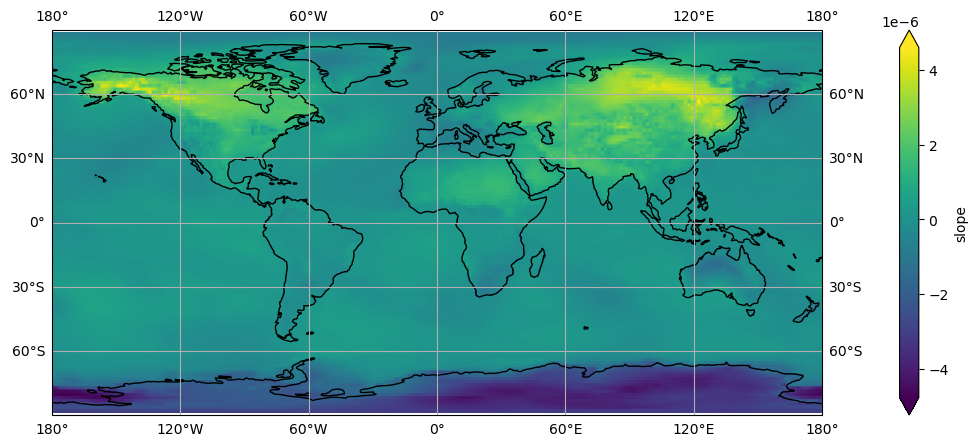

In [45]:
plot_map(mean.latitude, mean.longitude, slopes, "slope")

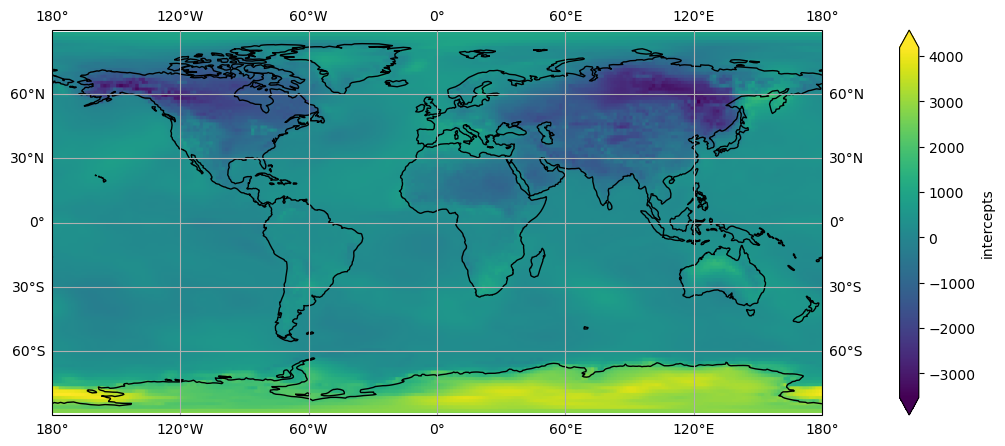

In [46]:
plot_map(mean.latitude, mean.longitude, intercepts, "intercepts")

In [3]:
data = xr.open_zarr("gs://weatherbench2/datasets/ifs_extended_range/weekly/ifs-ext-reforecast-full-single-level-weekly_avg.zarr")
temp_train = data["2m_temperature"].isel(prediction_timedelta=0).mean(dim=["number"])
temp_train

<xarray.DataArray '2m_temperature' (forecast_time: 730, hindcast_year: 20,
                                    latitude: 121, longitude: 240)> Size: 2GB
dask.array<mean_agg-aggregate, shape=(730, 20, 121, 240), dtype=float32, chunksize=(1, 1, 121, 240), chunktype=numpy.ndarray>
Coordinates:
  * forecast_time         (forecast_time) datetime64[ns] 6kB 2016-01-04 ... 2...
  * hindcast_year         (hindcast_year) int32 80B -20 -19 -18 -17 ... -3 -2 -1
  * latitude              (latitude) float32 484B -90.0 -88.5 ... 88.5 90.0
  * longitude             (longitude) float32 960B 0.0 1.5 3.0 ... 357.0 358.5
    prediction_timedelta  timedelta64[ns] 8B 00:00:00
    time                  (forecast_time, hindcast_year) datetime64[ns] 117kB dask.array<chunksize=(730, 20), meta=np.ndarray>
    valid_time            (forecast_time, hindcast_year) datetime64[ns] 117kB dask.array<chunksize=(365, 10), meta=np.ndarray>

In [15]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import xarray
mean = xr.open_dataset("../data_hindcast=0_forecast=0_20.nc")

X =None
y = None
for k in range(2):
    train_temp = mean["2m_temperature"].isel(prediction_timedelta=0)
    train_times = train_temp.valid_time.values
    num_times = np.array(pd.to_datetime(train_times).astype(np.int64)) *1e-9 # convert to seconds
    if X is None:
        X = num_times
        y = train_temp.values.reshape(train_temp.shape[0], -1)
    else:
        X = np.concatenate((X, num_times))
        y = np.concatenate((y, train_temp.values.reshape(train_temp.shape[0], -1)))

print(X.shape, y.shape)
model = LinearRegression()
model.fit(X.reshape(-1,1), y)

    


(40,) (40, 29040)


LinearRegression()

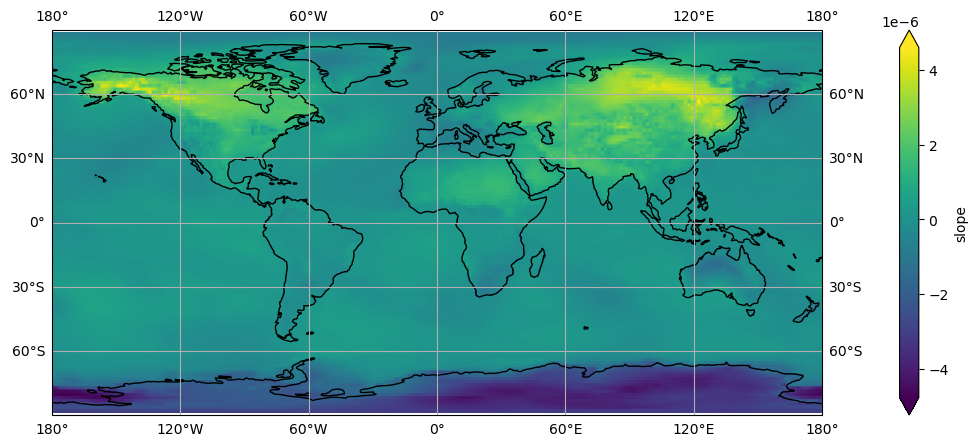

In [16]:
slopes= model.coef_.reshape(train_temp.shape[1], train_temp.shape[2])  # shape (lat, lon)
intercepts = model.intercept_.reshape(train_temp.shape[1], train_temp.shape[2])  # shape (lat, lon)
plot_map(mean.latitude, mean.longitude, slopes, "slope")

In [18]:
slopes.shape

(121, 240)

In [ ]:
# save sloeps intercept as netcdf
import xarray as xr
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression

ds = xr.Dataset(slopes,)